### Step 4: MVP

I will include most features within the model as I try to identify couple of problems as well as improvement points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

I was having hard time to get 

In [2]:
df_10k = pd.read_csv('data_the_babe/df_10k_ready_for_model.csv')

In [3]:
df_10k.shape

(9907, 130)

In [7]:
df.columns

Index(['Unnamed: 0', 'adOption', 'daysSinceInstall', 'hasEnoughCoin',
       'levelMode', 'levelNumber', 'numFails', 'percentageLeft', 'platform',
       'playTime',
       ...
       'ZA', 'de', 'en', 'es', 'fr', 'it', 'pt-BR', 'ru', 'tr', 'zh-CN'],
      dtype='object', length=130)

In [8]:
df = df_10k

Set target and predictors.

In [9]:
y = df['target']
X = df.drop(['target'],axis=1)

set the ratios.

In [10]:
success_ratio = min(y.value_counts()) / len(y)
failure_ratio = max(y.value_counts()) / len(y)

At this point we have 3 potential targets which are not confirmed to be main and we can not have signal for positive predictions for any of them and that is due to unbalanced data. Luckily I came across a technique called SMOTE. 

SMOTE: There are a number of methods available to oversample a dataset used in a typical classification problem (using a classification algorithm to classify a set of images, given a labelled training set of images). The most common technique is known as SMOTE: Synthetic Minority Over-sampling Technique.

Just want to increase my chances of having signal with SMOTE.

***SMOTE***

In [11]:
X = df.loc[:, df.columns != 'target']
y = df.loc[:, df.columns == 'target']

from imblearn.over_sampling import SMOTE

#train test split.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)  #as you can see we need to fit train data to os
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  12046
Number of no subscription in oversampled data 6023
Number of subscription 6023
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Note:*** You need to fit the oversampled data to the model when you use SMOTE. Since it increases the number of datapoints processing models will require more computational power.

***GradientBoostingClassifier***

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

Another reminder, we need to train the oversampled data for our model.

In [13]:
gb = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 1000)
gb.fit(os_data_X,os_data_y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

get the score.

In [14]:
gb.score(X_test, y_test)

0.8644466868483014

confusion matrice.

In [15]:
y_pred = gb.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2482   89]
 [ 314   88]]


In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

       False       0.89      0.97      0.92      2571
        True       0.50      0.22      0.30       402

   micro avg       0.86      0.86      0.86      2973
   macro avg       0.69      0.59      0.61      2973
weighted avg       0.83      0.86      0.84      2973



Scores look better compared to non-smoted model, yet I noticed that I made a ***deadly mistake***. Adwatch feature which is ~50% of the target, is 100%  dependent on one of the features called adoption, **Colinearity** . Certainly if players can not see ads they can not watch them. Which tells us that. Lets drop that and see the gradient boost scores again. I will leave the faulty model on the notebook in order to remind myself how damaging can it be to include mutually dependent features within the model.

In [ ]:
X.drop(['adOption'],axis = 1, inplace = True)

***SMOTE AFTER DROPPING adOption***

In [25]:
X = X
y = df.loc[:, df.columns == 'target']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  12046
Number of no subscription in oversampled data 6023
Number of subscription 6023
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
gb = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 1000)
gb.fit(os_data_X,os_data_y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

gb.score(X_test, y_test)

In [27]:
y_pred = gb.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2566    5]
 [ 394    8]]


In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

       False       0.87      1.00      0.93      2571
        True       0.62      0.02      0.04       402

   micro avg       0.87      0.87      0.87      2973
   macro avg       0.74      0.51      0.48      2973
weighted avg       0.83      0.87      0.81      2973



As can be seen the f1 score droped dramatically when we stoped tricking our model. In other words we still have a problem with receiving any signal. The model predicted positive for only 2% of the times and among that 2% the precision was only 62%.

In other words a combined target with using the complete dataset does not help us at all with gradient boost classifier.

I want to try a logistic regression model to see if I can reach a similar accuracy with enough number of features. 

Having noise with all features was a challange for me in past day, so I will get rid of the less important ones with RFE.

***REF -- Recursive Feature Elimination***

In [96]:
data_final_vars= df.columns.values.tolist()
y=['target']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False  True False False False  True False False False False
 False False False False  True False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False]
[115   1 109   1  74 113 108 102 100 110 114  93  68  69  67  29 104  80
  96  85  97 105 111 112 101 103  52  53 116  60   1  36  75  45   3  27
 117  31   1  23  44  94  71  33  54  64  30  13   2 119  83  32   8

In [97]:
feature_bool = rfe.support_

In [98]:
features_chosen_rfe = np.array(X)[feature_bool]

In [99]:
features_chosen_rfe

array(['adOption', 'hasEnoughCoin', 'AL', 'BD', 'GR', 'MU', 'MY', 'OM',
       'RS', 'SY'], dtype='<U16')

Lets see the win and fail ratios at following. 

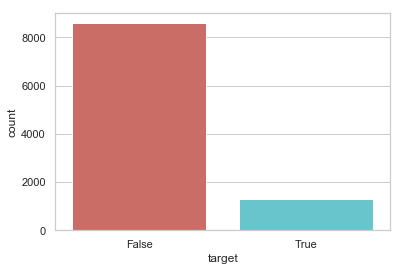

0.13253255274048653


<Figure size 432x288 with 0 Axes>

In [48]:
sns.countplot(x = 'target', data = df , palette = 'hls')
plt.show()
plt.savefig('count_target')
print(success_ratio)

In [49]:
df.groupby('target').mean()

,Unnamed: 0,adOption,daysSinceInstall,hasEnoughCoin,levelMode,levelNumber,numFails,percentageLeft,platform,playTime,...,ZA,de,en,es,fr,it,pt-BR,ru,tr,zh-CN
target,,,,,,,,,,,,,,,,,,,,,
False,4934.644170,0.153130,71.834419,0.548755,0.857110,88.149290,6.084245,5.518036,0.497440,48.161741,...,0.001164,0.017687,0.549337,0.014661,0.02781,0.038283,0.021759,0.159646,0.167559,0.003258
True,5073.144707,0.540746,60.666413,0.795126,0.843869,107.530845,5.738005,5.316832,0.449353,50.937548,...,0.000000,0.022848,0.517898,0.010663,0.02818,0.039604,0.019802,0.146992,0.211729,0.002285


In [50]:
from scipy.stats import pearsonr

corr = df.corr(method='spearman')

In [51]:
corr

,Unnamed: 0,adOption,daysSinceInstall,hasEnoughCoin,levelMode,levelNumber,numFails,percentageLeft,platform,playTime,...,ZA,de,en,es,fr,it,pt-BR,ru,tr,zh-CN
Unnamed: 0,1.000000,-0.001869,0.007306,-0.020841,0.002573,0.020190,0.016578,0.014055,-0.031564,0.009165,...,0.024028,-0.017764,-0.022509,0.000947,0.042495,0.020833,-0.024485,-0.000096,0.014889,0.007735
adOption,-0.001869,1.000000,-0.082626,0.005615,0.009286,-0.021917,-0.022779,0.003613,-0.162144,-0.008135,...,-0.016117,0.010773,-0.000259,0.002904,-0.017401,0.005316,0.009388,-0.037771,0.036795,-0.023926
daysSinceInstall,0.007306,-0.082626,1.000000,0.159088,-0.225098,0.632715,0.153595,-0.016962,0.192754,0.119006,...,0.022902,0.065366,-0.041482,-0.023532,0.016796,-0.000975,-0.044980,0.034922,0.011442,0.027481
hasEnoughCoin,-0.020841,0.005615,0.159088,1.000000,-0.155804,0.411498,0.006241,0.008117,0.010827,0.037795,...,0.014085,0.001804,-0.002128,-0.028424,-0.034151,0.004771,-0.016702,-0.027435,0.051418,0.032885
levelMode,0.002573,0.009286,-0.225098,-0.155804,1.000000,-0.180247,-0.013784,-0.053117,-0.043799,0.038585,...,-0.023076,-0.037770,0.006471,0.012765,0.008583,0.038964,0.003580,-0.021740,-0.006442,0.023039
levelNumber,0.020190,-0.021917,0.632715,0.411498,-0.180247,1.000000,0.240692,-0.009636,0.077311,0.222778,...,0.025313,0.068390,-0.055050,0.002333,-0.019599,0.022720,-0.022659,-0.025153,0.078044,-0.004977
numFails,0.016578,-0.022779,0.153595,0.006241,-0.013784,0.240692,1.000000,0.010855,-0.031383,0.130922,...,0.000697,0.015157,-0.057507,0.025466,0.019830,0.003028,0.019821,0.016979,0.027614,0.004063
percentageLeft,0.014055,0.003613,-0.016962,0.008117,-0.053117,-0.009636,0.010855,1.000000,-0.007668,0.006382,...,0.001890,-0.000304,0.022801,-0.024069,0.018664,-0.000591,-0.011363,-0.009842,-0.015377,-0.006644
platform,-0.031564,-0.162144,0.192754,0.010827,-0.043799,0.077311,-0.031383,-0.007668,1.000000,-0.039765,...,0.019643,-0.008080,-0.079170,0.043194,-0.020286,-0.042101,-0.105236,0.193477,-0.030746,0.057036
playTime,0.009165,-0.008135,0.119006,0.037795,0.038585,0.222778,0.130922,0.006382,-0.039765,1.000000,...,-0.003141,-0.003333,-0.011453,-0.040716,0.024714,-0.026308,0.008603,-0.013653,0.042872,-0.009883


In [100]:
X = os_data_X[features_chosen_rfe]
y = os_data_y['y']

***Implementing Logistic Model***

In [101]:
import statsmodels.api as sm
log_model = sm.Logit(y, X)

result = log_model.fit()
print(result.summary2())

         Current function value: 0.626138
         Iterations: 35
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.097     
Dependent Variable:   y                  AIC:                15104.9126
Date:                 2018-11-14 12:22   BIC:                15178.8775
No. Observations:     12046              Log-Likelihood:     -7542.5   
Df Model:             9                  LL-Null:            -8349.7   
Df Residuals:         12036              LLR p-value:        0.0000    
Converged:            0.0000             Scale:              1.0000    
No. Iterations:       35.0000                                          
-----------------------------------------------------------------------
               Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------
adOption        1.4501     0.0454 31.9603 0.0000      1.3612     1.5391
hasEnoughCoin  -0.0347     

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


get rid of features which represents p > alpha(0.05)

In [16]:
post_pvalue_features = ['adOption','GR','MU','MY','OM','SY']  #meh only remaining features... not cool

In [103]:
X=os_data_X[post_pvalue_features]
y=os_data_y['y']

In [104]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.627459
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.095     
Dependent Variable: y                AIC:              15128.7480
Date:               2018-11-14 12:30 BIC:              15173.1269
No. Observations:   12046            Log-Likelihood:   -7558.4   
Df Model:           5                LL-Null:          -8349.7   
Df Residuals:       12040            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
adOption       1.4167    0.0407  34.7882  0.0000   1.3369   1.4965
GR            -1.9019    0.5043  -3.7715  0.0002  -2.8902  -0.

people coutnties conclusion.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1503  256]
 [ 741 1114]]


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.67      0.85      0.75      1759
       True       0.81      0.60      0.69      1855

avg / total       0.74      0.72      0.72      3614



Fine results yet again the same problem.  adWatch is fully dependent on adOption.

At following you may see how model performs once we took of adOption.

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2566,    5],
       [ 394,    8]])

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test , y_pred))

             precision    recall  f1-score   support

      False       0.87      1.00      0.93      2145
       True       0.00      0.00      0.00       332

avg / total       0.75      0.87      0.80      2477



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
